# House Price Competition on Kaggle

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
plt.style.use(style='ggplot')

In [25]:
training_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')
training_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [26]:
training_dataset.shape

(1460, 81)

In [27]:
training_dataset.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

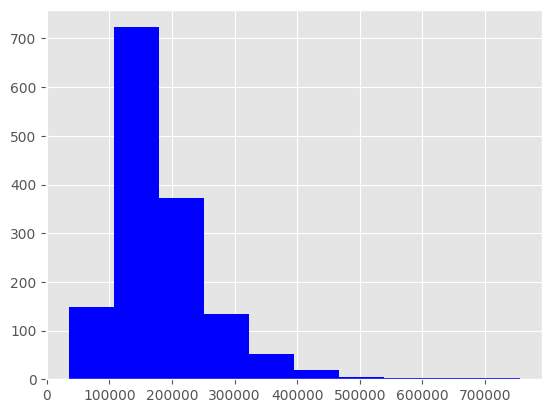

In [28]:
plt.hist(training_dataset.SalePrice, color='blue')
plt.show()

ما دوست داریم توزیع دیتا از یک حالت گوسین تبعیت کنه، اونجوری بهتره. میشه یکسری تبدیلاتی روی دیتا انجام داد که به شکل گوسین در بیاد. فعلا اینجا بحث نمیشه

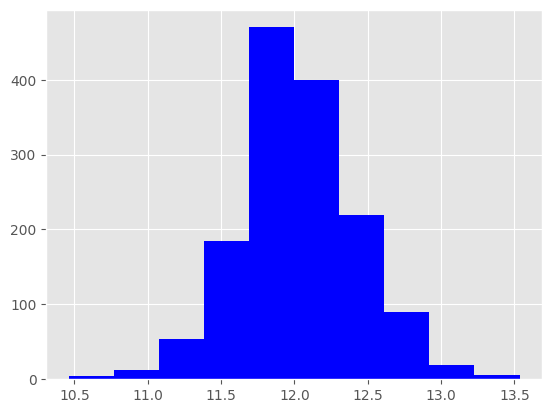

In [29]:
#using logaritmic transformation to make the distribution more Gussian
target = np.log(training_dataset.SalePrice)
plt.hist(target, color='blue')
plt.show()

In [30]:
numeric_features = training_dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

ترینینگ دیتاست رو با پانداس ساختیم و الان دیتاها یا فیچرهایی که عددی هستند رو جدا کردیم

در ادامه کورولیشن دیتاهای عددی رو با تارگت مون که همون قیمت خونه هست رو میسنجیم

In [31]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


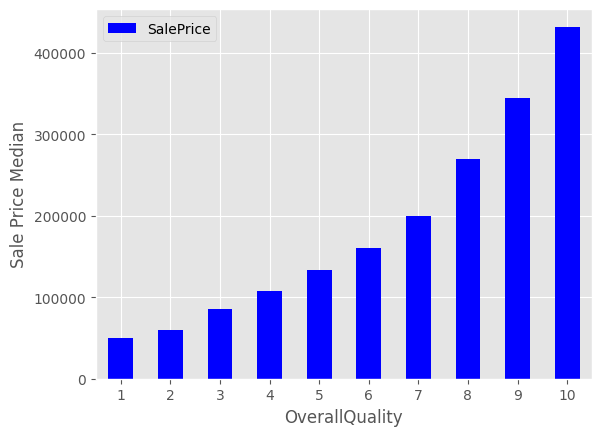

In [32]:
quality_pivot = training_dataset.pivot_table(index='OverallQual', 
                                            values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('OverallQuality')
plt.ylabel('Sale Price Median')
plt.xticks(rotation=0)
plt.show()

برای اورال کوال مثلا پنج یه عالمه قیمت فروش هست. اون فانکشن میگه میانه این قیمت ها رو رسم کن برای اون اورال کوال

In [33]:
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


In [34]:
training_dataset.OverallQual

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

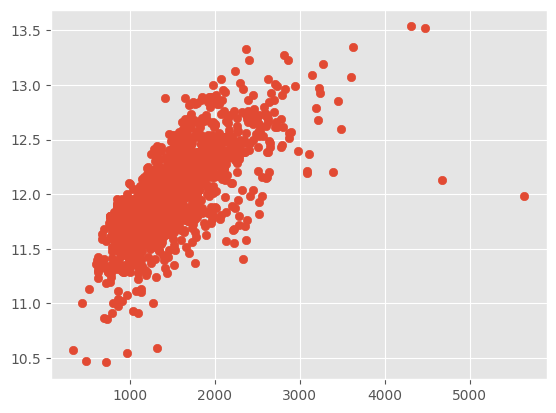

In [35]:
plt.scatter(x=training_dataset['GrLivArea'], y=np.log(training_dataset['SalePrice']))

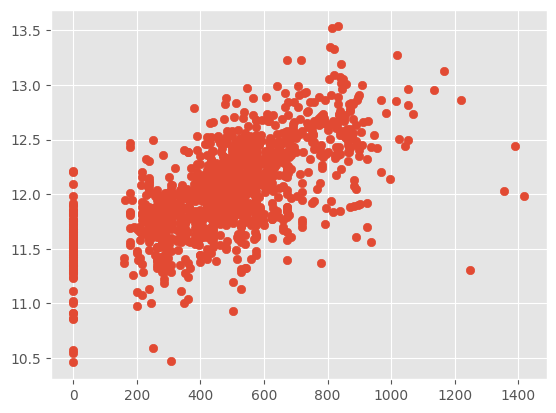

In [36]:
plt.scatter(x=training_dataset["GarageArea"], y=np.log(training_dataset["SalePrice"]))

دیتای اصلی مشخصه، یه مقداری اوتلایر داریم که باید به حساب شون برسیم

In [37]:
training_dataset = training_dataset[training_dataset["GarageArea"] < 1200]

(-200.0, 1600.0)

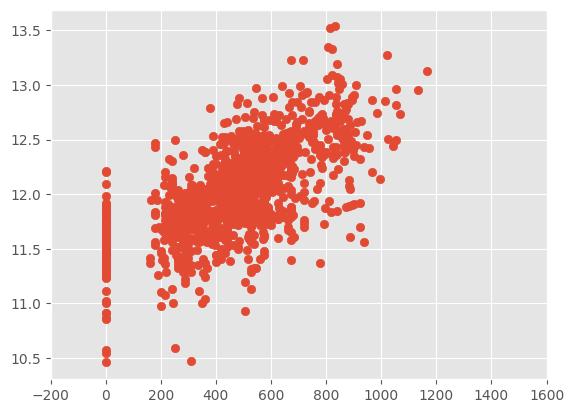

In [38]:
plt.scatter(x=training_dataset["GarageArea"], y=np.log(training_dataset["SalePrice"]))
plt.xlim(-200, 1600)

سل بعدی مربوط به فیچرهای نال هستش

In [39]:
nulls = pd.DataFrame(training_dataset.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Features'
nulls

,Null Count
Features,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageYrBlt,81
GarageCond,81
GarageType,81


ما نومریک فیچر رو داشتیم. حالا میریم به فیچرهای کتگوری

In [40]:
categorical = training_dataset.select_dtypes(exclude=[np.number])
categorical.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


الان فیچر استریت دو تا مقدار رو میگیره. یکی پیو یعنی آسفالت و مقدار دیگه اش رو حالا اینجا نشون نداده. ما اینو میتونیم هات کد کنیم. آسفالت رو بگیریم یک و اون یکی دیگه رو بگیریم صفر.

In [41]:
training_dataset['enc_street'] = pd.get_dummies(training_dataset.Street, drop_first=True)
test_dataset['enc_street'] = pd.get_dummies(test_dataset.Street, drop_first=True)
print('Encoded: \n')
print(training_dataset.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


And now is time for missing values. for this we use "interpolate" which calculates the average value of the feature and assign it to the missing value

In [42]:
data = training_dataset.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() !=0)

0

## Building the model

In [43]:
y = np.log(training_dataset.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [45]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [46]:
print ('R^2 is: \n', model.score(X_test, y_test))
predictions = model.predict(X_test)
print('RMSE is: \n', mean_squared_error(y_test, predictions))

R^2 is: 
 0.8875183697245673
RMSE is: 
 0.01739150533842891


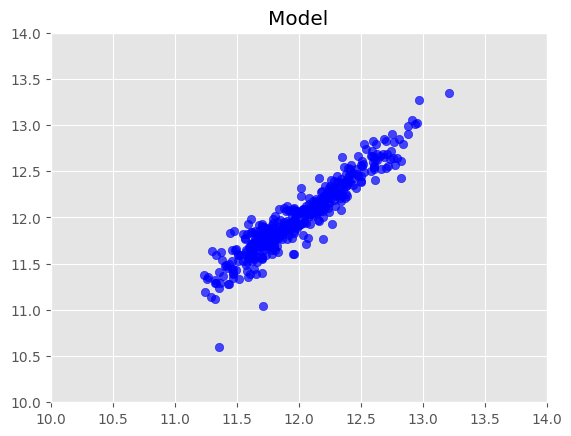

In [55]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=0.7, color='b') #alpha is for better shpwing overlapping data
plt.title('Model')
#plt.xlabel('Predicted Price')
#plt.ylabel('Actual Price')
plt.xlim(10, 14)
plt.ylim(10, 14)
plt.show()

## Submission

In [56]:
submission = pd.DataFrame()
submission['Id'] = test_dataset.Id
feats = test_dataset.select_dtypes(
    include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print('original predictions are: \n', predictions[:5])
print('final predictions are: \n', final_predictions[:5])
submission['SalePrice'] = final_predictions
submission.head()


original predictions are: 
 [11.75771357 11.69565273 12.07596932 12.20781588 12.11574211]
final predictions are: 
 [127735.06264756 120048.69448083 175600.9417667  200348.95054051
 182725.82928823]


,Id,SalePrice
0,1461,127735.062648
1,1462,120048.694481
2,1463,175600.941767
3,1464,200348.950541
4,1465,182725.829288


In [57]:
submission.to_csv('submission.csv', index=False)

https://www.youtube.com/watch?v=69Te9Nw3i9c